<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YQGwFgxwujjXa7Nwun8GQZDoFyykHlVe#scrollTo=w2E0cXt5RvNr)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

#  **🤖 Mem0: Intelligent Memory for Personalized AI**

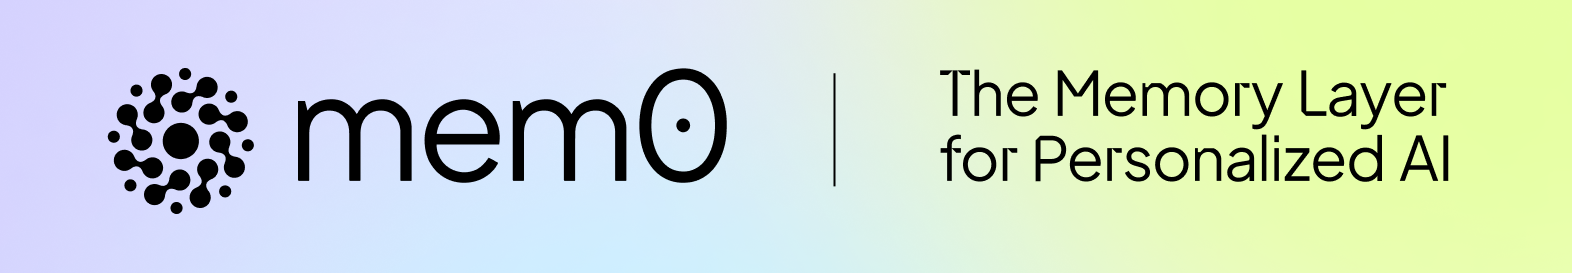

Mem0 (pronounced as "mem-zero") enhances AI assistants and agents with an intelligent memory layer, enabling personalized AI interactions. Mem0 remembers user preferences, adapts to individual needs, and continuously improves over time, making it ideal for customer support chatbots, AI assistants, and autonomous systems.

###**Setup and Installation**


Install the Mem0 package via pip:



In [ ]:
!pip install mem0ai openai

###Setup API Keys


In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

###Basic Usage
Mem0 requires an LLM to function, with gpt-4o from OpenAI as the default. However, it supports a variety of LLMs;</n> for details,
refer to Thier [Supported LLMs documentation.](https://docs.mem0.ai/llms)
* Create Api Key From Mem0 :- https://app.mem0.ai/dashboard/api-keys

First step is to instantiate the memory:



In [ ]:
from mem0 import MemoryClient

m = MemoryClient(api_key="your_actual_api_key_here")

###You can perform the following task on the memory:

* Add: Store a memory from any unstructured text
* Search: Fetch memories based on a query
* Get: Return memories for a certain user/agent/session


###Add: Store a memory from any unstructured text



In [ ]:
# For a user
result = m.add("I like to take long walks on weekends.", user_id="alice", metadata={"category": "hobbies"})

### Search For Relevent Memories

In [ ]:
related_memories = m.search(query="Help me plan my weekend.", user_id="alice")
related_memories

[{'id': 'e4d77647-85ac-4282-af2d-f584fd117e56',
  'memory': 'Likes to take long walks on weekends',
  'user_id': 'alice',
  'hash': '8d6df2829511af7ec401664bc4339553',
  'metadata': {'category': 'hobbies'},
  'categories': ['hobbies'],
  'created_at': '2024-12-24T03:25:46.733759-08:00',
  'updated_at': '2024-12-24T03:25:46.733771-08:00',
  'score': 0.47645577788352966}]

###Get all Memories From User

In [ ]:
# Get all memories
all_memories = m.get_all(user_id="alice")
all_memories

[{'id': 'e4d77647-85ac-4282-af2d-f584fd117e56',
  'memory': 'Likes to take long walks on weekends',
  'user_id': 'alice',
  'hash': '8d6df2829511af7ec401664bc4339553',
  'metadata': {'category': 'hobbies'},
  'categories': ['hobbies'],
  'created_at': '2024-12-24T03:25:46.733759-08:00',
  'updated_at': '2024-12-24T03:25:46.733771-08:00'}]

###Personalized AI Tutor

The Personalized AI Tutor leverages Mem0 to retain information across interactions, enabling a tailored learning experience. By integrating with OpenAI’s GPT-4 model, the tutor can provide detailed and context-aware responses to user queries.

In [ ]:
from openai import OpenAI
from mem0 import MemoryClient

# Set the OpenAI API key
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# Initialize the OpenAI client
client = OpenAI()

class PersonalAITutor:
    def __init__(self):

        self.memory = MemoryClient(api_key="your_actual_api_key_here")
        self.client = client
        self.app_id = "app-1"

    def ask(self, question, user_id=None):
        """
        Ask a question to the AI and store the relevant facts in memory

        :param question: The question to ask the AI.
        :param user_id: Optional user ID to associate with the memory.
        """
        # Start a streaming chat completion request to the AI
        stream = self.client.chat.completions.create(
            model="gpt-4",
            stream=True,
            messages=[
                {"role": "system", "content": "You are a personal AI Tutor."},
                {"role": "user", "content": question}
            ]
        )
        # Store the question in memory
        self.memory.add(question, user_id=user_id, metadata={"app_id": self.app_id})

        # Print the response from the AI in real-time
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                print(chunk.choices[0].delta.content, end="")

    def get_memories(self, user_id=None):
        """
        Retrieve all memories associated with the given user ID.

        :param user_id: Optional user ID to filter memories.
        :return: List of memories.
        """
        return self.memory.get_all(user_id=user_id)

# Instantiate the PersonalAITutor
ai_tutor = PersonalAITutor()

# Define a user ID
user_id = "john_doe"

# Ask a question
ai_tutor.ask("I am learning introduction to CS. What is queue? Briefly explain.", user_id=user_id)


A queue in computer science is a particular kind of abstract data type or collection in which the entities in the collection are kept in order and the principal operations on the collection are the addition of entities to the rear terminal position, known as enqueue, and removal of entities from the front terminal position, known as dequeue. 

This makes the queue a First-In-First-Out (FIFO) data structure. In a FIFO data structure, the first element added to the queue will be the first one to be removed. It's analogous to the queue in daily life, like lining up to order in a restaurant, where the first one to line up is the first one to get served and leave.

###Fetching Memories

In [ ]:
memories = ai_tutor.get_memories(user_id=user_id)
for m in memories:
    print(m['memory'])

Learning introduction to Computer Science


###Customer Support AI Agent


The Customer Support AI Agent leverages Mem0 to retain information across interactions, enabling a personalized and efficient support experience.

In [ ]:
from openai import OpenAI
from mem0 import MemoryClient

# Set the OpenAI API key
class CustomerSupportAIAgent:
    def __init__(self):
        """
        Initialize the CustomerSupportAIAgent with memory configuration and OpenAI client.
        """

        self.memory = MemoryClient(api_key="your_actual_api_key_here")
        self.client = OpenAI()
        self.app_id = "customer-support"

    def handle_query(self, query, user_id=None):
        """
        Handle a customer query and store the relevant information in memory.

        :param query: The customer query to handle.
        :param user_id: Optional user ID to associate with the memory.
        """
        # Start a streaming chat completion request to the AI
        stream = self.client.chat.completions.create(
            model="gpt-4",
            stream=True,
            messages=[
                {"role": "system", "content": "You are a customer support AI agent."},
                {"role": "user", "content": query}
            ]
        )
        # Store the query in memory
        self.memory.add(query, user_id=user_id, metadata={"app_id": self.app_id})

        # Print the response from the AI in real-time
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                print(chunk.choices[0].delta.content, end="")

    def get_memories(self, user_id=None):
        """
        Retrieve all memories associated with the given customer ID.

        :param user_id: Optional user ID to filter memories.
        :return: List of memories.
        """
        return self.memory.get_all(user_id=user_id)

# Instantiate the CustomerSupportAIAgent
support_agent = CustomerSupportAIAgent()

# Define a customer ID
customer_id = "jane"

#### Handle a customer query


In [ ]:
# Handle a customer query
support_agent.handle_query("I need help with my recent order. It hasn't arrived yet.", user_id=customer_id)

###Fetching Memories

In [ ]:
memories = support_agent.get_memories(user_id=customer_id)
memories